<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Tabular%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the packages we need for today. We will be using [`fastai`](https://www.fast.ai/) to create our AI model. This library makes it easy to get started. As the creators of `fastai` have put it:

> `fastai` - Making neural nets uncool again!



In [ ]:
from fastai.tabular import *
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

## Setup

As always, the first we will do is to explore the dataset. We will be using the same dataset as before [(`The Adult Dataset`)](https://archive.ics.uci.edu/ml/datasets/adult). Since you are already familiar with the dataset, we will be focusing on more advanced topics today. 

In [ ]:
# Downloading and unzipping the dataset
path = untar_data(URLs.ADULT_SAMPLE)

# Reading the csv dataset
data = pd.read_csv(path/'adult.csv')

Let's remind ourselves of our dataset columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


> Side note on `Non-Null Count`
* Notice that most columns do not have any missing values. However some columns such as `occupation` have some missing (null) values
* We will cover how to deal with missing values today

> Side note on `Dtype`
* int64: integer (numerical/continuous)
* float64: decimal (numerical/continuous)
* object: text/string (categorical)

## Plotting

Plotting helps us visualise the datasets much more quickly and make adjustments to our analysis. This is sometimes referred to as **Feature engineering** since we already have some understanding of the dataset and what each number means. 

### Age

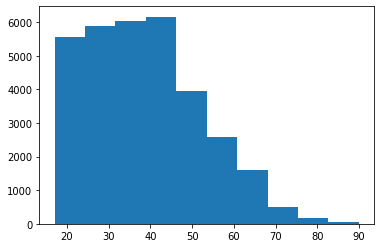

In [ ]:
## plotting a histogram of the age data
plt.hist(data['age']);

---

⭐  Do you see any issues here?

---

You might notice that the data is **skewed**. This means that our age data is not symmetrical. There are more values between the age group of 20-40 that there are between 50-80. Whenever we see data that does not look symmetrical, we will need to **normalise** our data. One way to do this is to pass the data into a `log` function. Let's see if that works.

(array([2410., 2362., 4126., 4265., 5161., 5347., 4382., 3172., 1141.,  195.]),
 array([2.833213, 2.999873, 3.166533, 3.333192, 3.499852, 3.666512, 3.833171, 3.999831, 4.16649 , 4.33315 , 4.49981 ]),
 <a list of 10 Patch objects>)

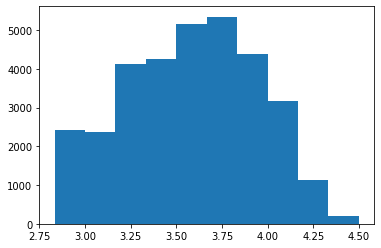

In [ ]:
## attemp to normalise the age data
plt.hist(log(data['age']))

This looks a lot better! Now our data is more symmetrical than before. There are other ways of normalising data but `log` is used by most Deep Learning engineers whenever **normalisation** is required.

### Workclass

How do we plot a categorical value? We need at least one numeric value. To do so we can convert our `salary` using the following logic
* `salary < 50k = 0`
* `salary >= 50k = 1`

In [ ]:
## Make a copy of the data
data_mod = data.copy() 

## Replacing salary column with 0 and 1 taking 50k is the threshold
data_mod['salary'] = data_mod['salary'].apply(lambda x: 1 if x=='>=50k' else 0)

Ok, now we can plot a categorical plot. You can also call this a bar chart with categories in x axis.

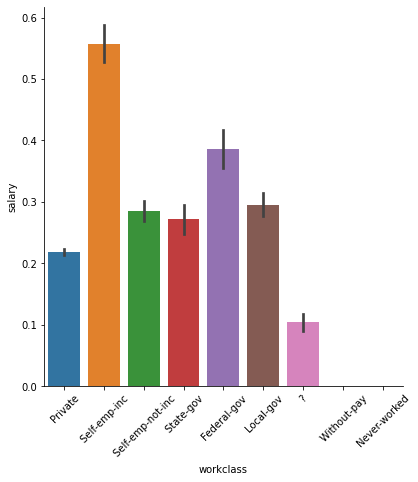

In [ ]:
## Plot the categorical plot
sns.catplot(x="workclass", y="salary", kind='bar', height=6, data=data_mod)

## Rotate the x axis by 45 degree to more easily see the labels
plt.xticks(rotation=45);

This plot shows the variatiob of each `workclass` category in their `salary`. The black line at the top of each bar chart indicates the *variation* in data. The smaller the black line the closer most data points are to the average value.

---

⭐  Can we merge `Without-pay` and `Never-worked` in this case?

---

### Education

---

⭐  Plot a categorical bar chart for `education`

---

In [ ]:
#################
#### YOUR TURN
################
## Fill in the ___ below 
sns.catplot(x=____, y=____, kind=____, height=7, data=data_mod)

## Rotate the x axis by 45 degree to more easily see the labels
plt.xticks(rotation=60);

## Hint: look at the previous section

You should always look at your dataset and see if it makes sense to you. You should always look out for **outliers** and **missing values**. These issues can lead to an inccurate model later when you start training.

### Occupation

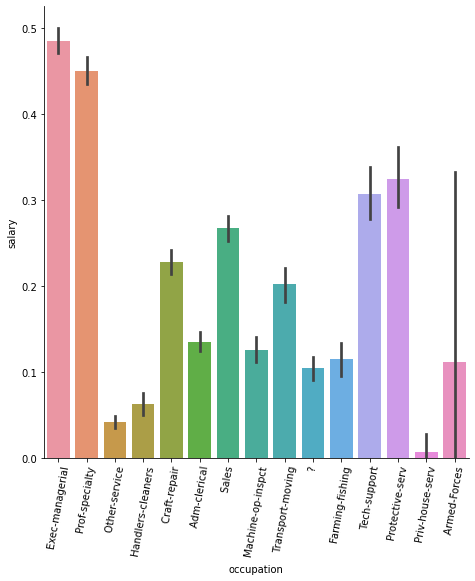

In [ ]:
## Plot the categorical plot
sns.catplot(x="occupation", y="salary", kind='bar', height=7, data=data_mod)

## Rotate the x axis by 45 degree to more easily see the labels
plt.xticks(rotation=80);

Which `occupation` is more likely to have a higher salary? It is probably no surprise that `Exec-managerial` jobs have the highest paid out of all the other options.

---

⭐  Pick a categorical column and apply the same categorical plot

---

In [ ]:
## This list might help you find some other categorical variables
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 3.7+ MB


In [ ]:
#################
#### YOUR TURN
################
## Fill in the ___ below 
sns.catplot(x=____, y=____, kind=____, height=____, data=data_mod)

## Rotate the x axis
plt.xticks(rotation=____);

## Hint: look at the sections above